In [28]:
# Data Loading and Exploring
import pandas as pd
import numpy as np

# Visulization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Performance Masure Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Filter out Warning
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [29]:
filepath = 'D:/Project/ml_project/notebook/final_data.csv'
df = pd.read_csv(filepath)

### Correlation analysis


<AxesSubplot: >

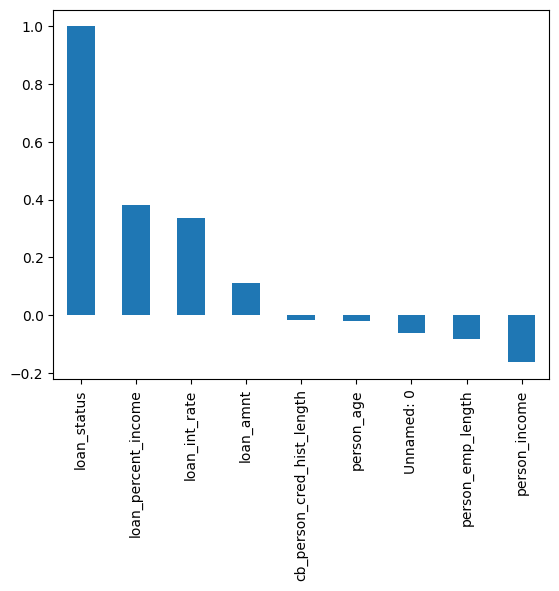

In [30]:
# selecting data with numerical values 
cor_df = df.select_dtypes(exclude=object)

# calculating correlation with loan_status column
correlation = cor_df.corr()['loan_status'].sort_values(ascending=False)

# Ploting bar plot
correlation.plot.bar()

<AxesSubplot: >

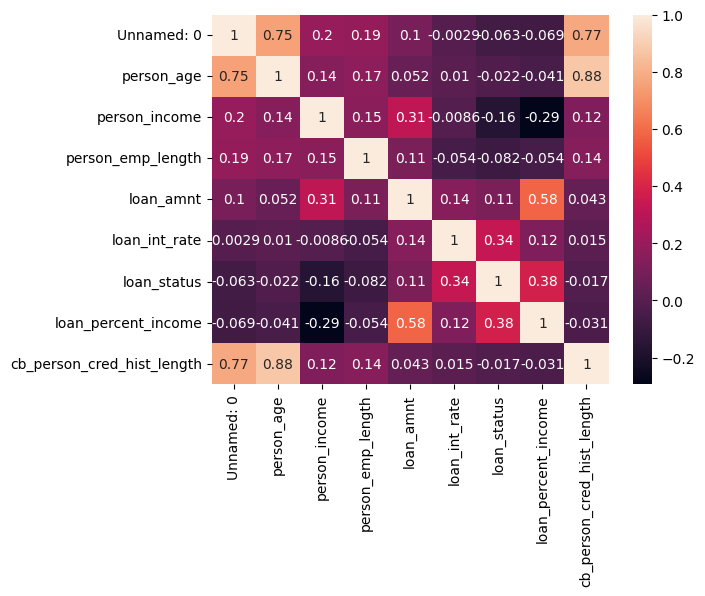

In [31]:
# creating heatmap to find colinearity between columns
sns.heatmap(cor_df.corr(),annot=True)

## Lable Encoding & Train Test Split

In [32]:
# Selecting fearures 
selected_features = df

In [33]:
print(df.groupby('person_home_ownership')['person_home_ownership'].value_counts())
print(df.groupby('loan_intent')['loan_intent'].value_counts())

person_home_ownership
MORTGAGE    13091
OTHER         107
OWN          2410
RENT        16072
Name: count, dtype: int64
loan_intent
DEBTCONSOLIDATION    5064
EDUCATION            6288
HOMEIMPROVEMENT      3510
MEDICAL              5896
PERSONAL             5368
VENTURE              5554
Name: count, dtype: int64


In [34]:
intent = {"DEBTCONSOLIDATION":5064,
"EDUCATION":6288,
"HOMEIMPROVEMENT":3510,
"MEDICAL":5896,
"PERSONAL":5368,
"VENTURE":5554}

ownership = {"MORTGAGE":13091,
"OTHER":107,
"OWN":2410,
"RENT":16072}

grade = {'A': 6, 
'B': 5, 
'C': 4,
'D': 3, 
'E': 2, 
'F': 1, 
'G': 0}

binary = {'Y':1,'N':0}

In [35]:
# Performing encoding for loan_grade,loan_intent,person_home_ownership
selected_features['loan_grade'] = selected_features['loan_grade'].map(grade)
selected_features['loan_intent'] = selected_features['loan_intent'].map(intent)
selected_features['person_home_ownership'] = selected_features['person_home_ownership'].map(ownership)
# Performing binary encoding
selected_features['cb_person_default_on_file'] = selected_features['cb_person_default_on_file'].map(binary)

In [36]:
# Previewing the data
selected_features.head(3)

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,16072,123.0,5368,3,3500000,16.02,1,0.59,1,3
1,1,21,9600,2410,5.0,6288,5,100000,11.14,0,0.10,0,2
2,2,25,9600,13091,1.0,5896,4,550000,12.87,1,0.57,0,3


In [37]:
# Selecting target and feature 
X = selected_features.drop(['loan_status'],axis=1)
y = selected_features['loan_status']

# performing standard scaler
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.3, random_state=33)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify = y_test, test_size=0.2, random_state=33)

In [38]:
# creating randomforestclassifier
rf_classifier = RandomForestClassifier()

## Model Tuning

In [39]:
# Creating parameter grid
parameter_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'n_estimators': [200, 500, 800],
    'max_leaf_nodes' : [20, 30, 40]
}

# Applying gridsearch methode 
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=parameter_grid, cv=3)

In [40]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_leaf_nodes': [20, 30, 40],
                         'n_estimators': [200, 500, 800]})

In [41]:
# Best hyperparameters for randomforest 
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_leaf_nodes': 40,
 'n_estimators': 500}

In [50]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# makeing predictions on X_test data
y_pred = rf_classifier.predict(X_test)

Accuracy score of the model 0.9310889005786428
Classification report 

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1491
           1       0.97      0.70      0.82       410

    accuracy                           0.93      1901
   macro avg       0.95      0.85      0.89      1901
weighted avg       0.93      0.93      0.93      1901



Text(0.5, 1.0, 'Confusion matrix: Random Forest')

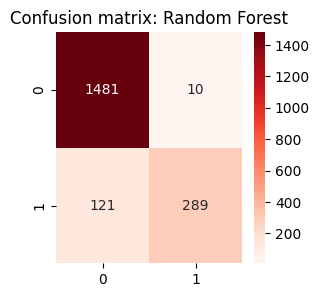

In [52]:
# Accuracy Score
print("Accuracy score of the model", accuracy_score(y_test,y_pred))

# classification report 
print("Classification report \n")
print(classification_report(y_test,y_pred))

# Creating confusion matrix
plt.figure(figsize = (3,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Reds", fmt='g')
plt.title('Confusion matrix: Random Forest')

## Cross Validation

In [45]:
# creating RepeatedStratifiedKFold 
cross_validation = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=10)

# Performing Cross-Validation
k_scores = cross_val_score(rf_classifier, X_val, y_val, scoring='accuracy', cv=cross_validation
                           , n_jobs=-1, error_score='raise')

# Accuracy Score
print('Accuracy: %.3f (%.3f)' % (np.mean(k_scores), np.std(k_scores)))

Accuracy: 0.915 (0.010)


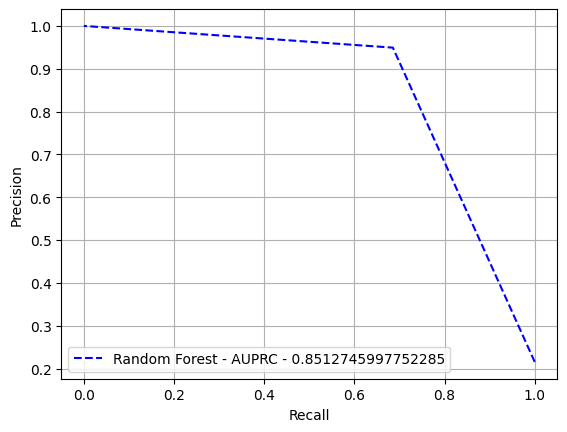

In [46]:
# Calculating precision and recall
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred)
area_rf = auc(recall_rf, precision_rf)


plt.plot(recall_rf, precision_rf, linestyle="--", color='b', label='Random Forest - AUPRC - ' + str(area_rf))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()